#Import Libreries and Dataset

##Import Libreries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from wordcloud import WordCloud,STOPWORDS
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import preprocessing
import pandas_profiling
%matplotlib inline


##Import dataset
Import data from google drive and load into pandas data frame

In [ ]:
# Copy data from google drive
drive.mount('/content/drive')
!cp /content/drive/My\ Drive/data/winemag.zip . 

#unzip by using ZipFile module
from zipfile import ZipFile
# Create a ZipFile Object and extract
with ZipFile('winemag.zip', 'r') as zipObj:
 zipObj.extractall()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load csv file to pandas data frame
df = pd.read_csv('winemag-data-190314.csv')

# Exploratory Data Analysis

Inital exploration of dataset to select initial features

In [ ]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


## Feature exclution
After looking into the feature columns we can see the unnamed feature, tester twiter account and title can be dropped as these fields do not have relation with wine price

In [ ]:
df_wine = df[['country', 'description', 'designation', 'points',  'price', 'province','region_1', 'taster_name','region_2','variety', 'winery', 'vintage' ]]
df_wine.head()

,country,description,designation,points,price,province,region_1,taster_name,region_2,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,NaN,White Blend,Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,NaN,Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Willamette Valley,Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Willamette Valley,Pinot Noir,Sweet Cheeks,2012.0


## Dataframe exploration

In [ ]:
# Identify the inital dataframe shape
initial_df_shape = df_wine.shape
print(f'Initial dataframe Shape {initial_df_shape}')

Initial dataframe Shape (141617, 12)


In [ ]:
# Review the dataframe type
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141617 entries, 0 to 141616
Data columns (total 12 columns):
country        141556 non-null object
description    141617 non-null object
designation    101435 non-null object
points         141617 non-null int64
price          131959 non-null float64
province       141556 non-null object
region_1       118731 non-null object
taster_name    116700 non-null object
region_2       54785 non-null object
variety        141616 non-null object
winery         141617 non-null object
vintage        136383 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 13.0+ MB


In [ ]:
pandas_profiling.ProfileReport(df_wine)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,12
Number of observations,141617
Total Missing (%),11.2%
Total size in memory,13.0 MiB
Average record size in memory,96.0 B
Numeric,3
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## Handeling Missing Data

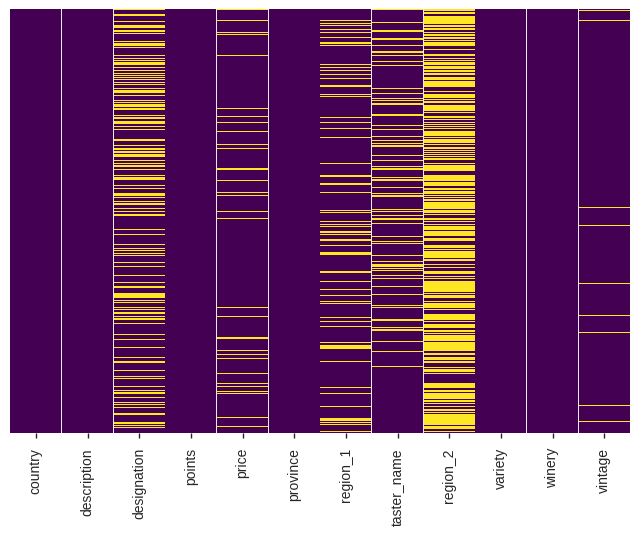

In [ ]:
sns.heatmap(df_wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_wine.isnull().sum()

country           61
description        0
designation    40182
points             0
price           9658
province          61
region_1       22886
taster_name    24917
region_2       86832
variety            1
winery             0
vintage         5234
dtype: int64

### Handeling missing data for country

In [ ]:
df_wine['country'].value_counts().count()

44

In [ ]:
df_wine['country'].value_counts().head(15)

US              58821
France          25169
Italy           21200
Spain            7185
Portugal         6160
Chile            4683
Argentina        3997
Austria          3604
Australia        2579
Germany          2468
New Zealand      1556
South Africa     1489
Israel            577
Greece            470
Canada            262
Name: country, dtype: int64

In [ ]:
len(df_wine[df_wine['country'].isnull()])

61

In [ ]:
df_wine[df_wine['country'].isnull()]

,country,description,designation,points,price,province,region_1,taster_name,region_2,variety,winery,vintage
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,Mike DeSimone,NaN,Chinuri,Gotsa Family Wines,2014.0
3124,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,Roger Voss,NaN,Red Blend,Barton & Guestier,NaN
4229,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,Mike DeSimone,NaN,Ojaleshi,Kakhetia Traditional Winemaking,2012.0
9469,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,Susan Kostrzewa,NaN,White Blend,Tsililis,2015.0
9710,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,Jeff Jenssen,NaN,Chardonnay,Ross-idi,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119546,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,Michael Schachner,NaN,Tempranillo,El Capricho,2015.0
119668,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,Mike DeSimone,NaN,Red Blend,Büyülübağ,2012.0
119918,NaN,This wine offers a delightful bouquet of black...,NaN,91,32.0,NaN,NaN,Mike DeSimone,NaN,Merlot,Psagot,2014.0
127857,NaN,"Aromas of waxy melon, orange rind, pear flesh ...",NaN,90,20.0,NaN,NaN,Lauren Buzzeo,NaN,Marsanne,Leeuwenkuil,2015.0


In [ ]:
df_wine[df_wine['country'].isnull()]['province'].notnull().count()

61

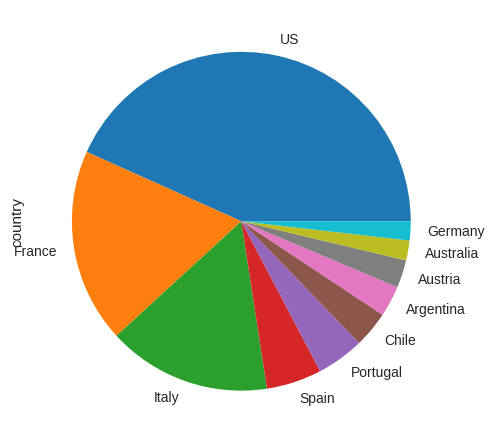

In [ ]:
df_wine['country'].value_counts().head(10).plot.pie()

plt.gca().set_aspect('equal')

In [ ]:
df_wine[df_wine['country'].isnull()]['region_1'].notnull().count()

61

From above analysis we can see that there total 61 rows have missing country values. To find the origin of the country we can look into province and region field. But both the fields are missing if the country is missing. Hence we don't have any other options beside deleting the rows with missing country values

In [ ]:
df_wine = df_wine.dropna(subset=['country'])
len(df_wine[df_wine['country'].isnull()])

0

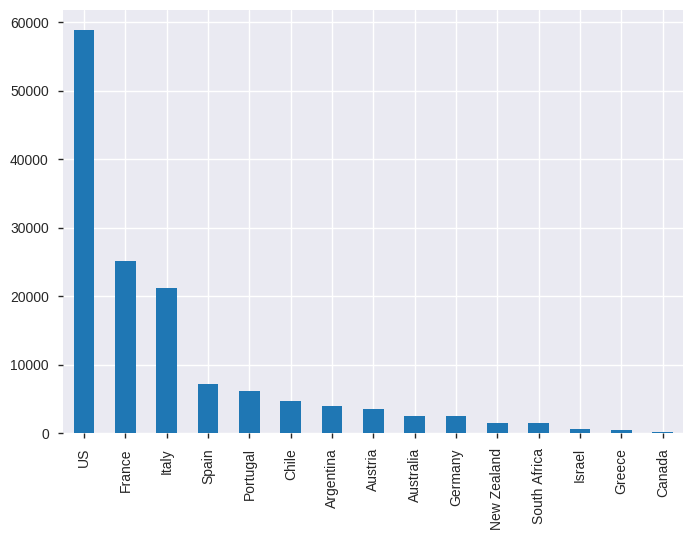

In [ ]:
df_wine['country'].value_counts().head(15).plot.bar()
plt.show()

In [ ]:
df_wine['price_log'] = np.log(df_wine['price'])

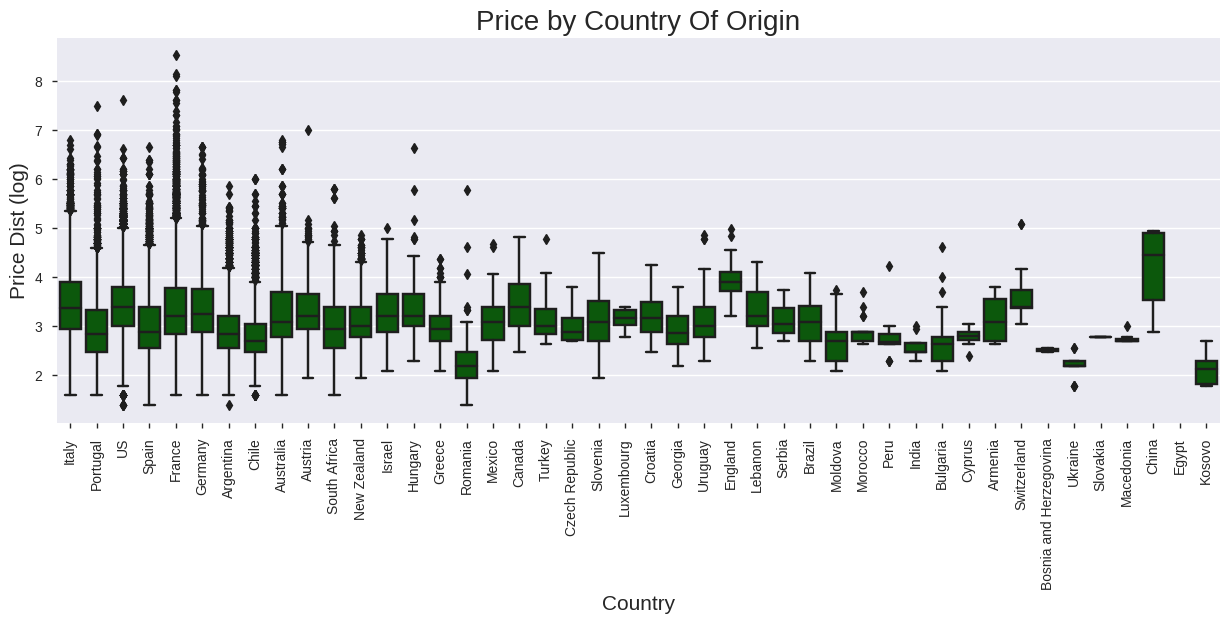

In [ ]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price_log', color='darkgreen', data=df_wine)
g.set_title("Price by Country Of Origin", fontsize=20)
g.set_xlabel("Country", fontsize=15)
g.set_ylabel("Price Dist (log)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

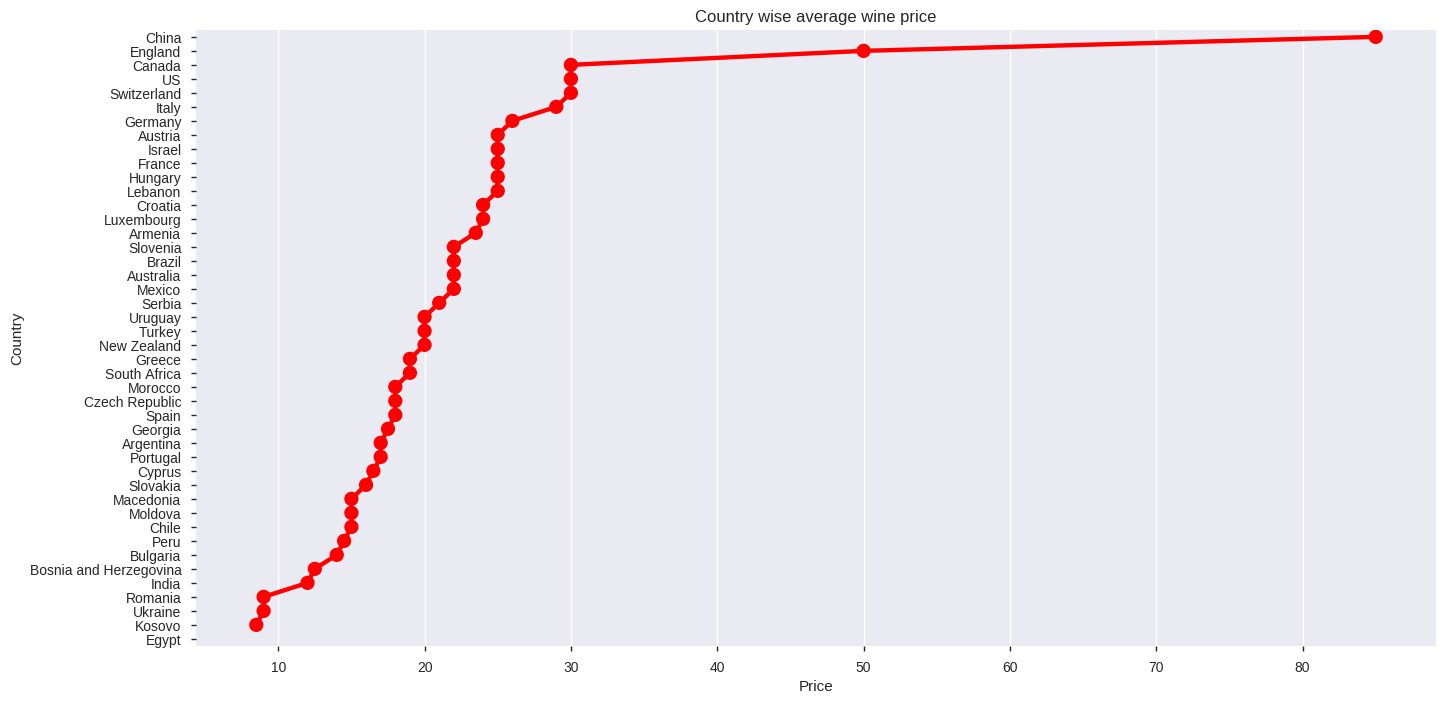

In [ ]:
cnt = df_wine.groupby(['country',]).median()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

### Handeling designation

In [ ]:
df_wine['designation'].value_counts().count()

43245

In [ ]:
df_wine['designation'].value_counts()

Reserve                         2098
Estate                          1420
Reserva                         1321
Riserva                          832
Estate Grown                     664
                                ... 
Heritage Selection Estate          1
Jovis Italic Blend                 1
Caligo Sweet White Wine            1
Moody Vineyard Reserve             1
Apostoles Palo Cortado Viejo       1
Name: designation, Length: 43245, dtype: int64

In [ ]:
len(df_wine[df_wine['designation'].isnull()])

40170

In [ ]:
designation_missing = len(df_wine[df_wine['designation'].isnull()])/df_wine.shape[0]*100
print(f'{designation_missing:.2f}% designation values are missing in the dataset')

28.38% designation values are missing in the dataset


Total 28.38 percent designation data is missing and from the unique fields it also looks like the designbation doens't have much impact in the output. hence we can drop this feature from our dataframe

In [ ]:
del df_wine['designation']

### Analyse points column

In [ ]:
df_wine['points'].value_counts().count()

21

In [ ]:
df_wine['points'].value_counts()

88     18400
87     17823
90     16877
89     13554
86     13186
91     12656
92     10781
85     10091
93      7555
84      6695
94      4441
83      3205
95      1964
82      1935
81       735
96       732
80       411
97       318
98       119
99        44
100       34
Name: points, dtype: int64

In [ ]:
len(df_wine[df_wine['points'].isnull()])

0

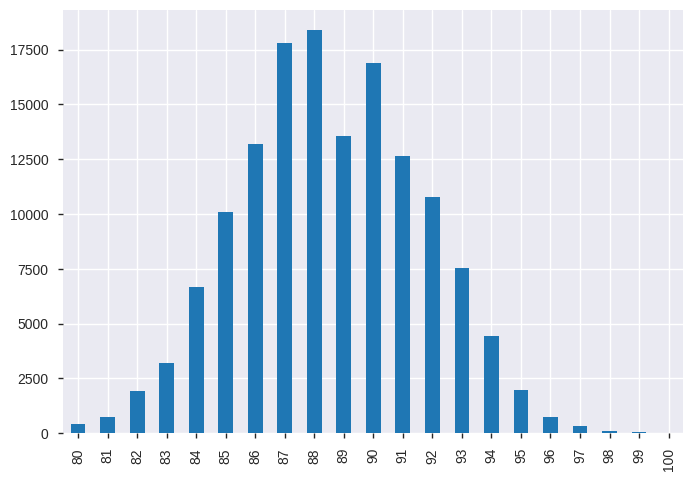

In [ ]:
df_wine['points'].value_counts().sort_index().plot.bar()

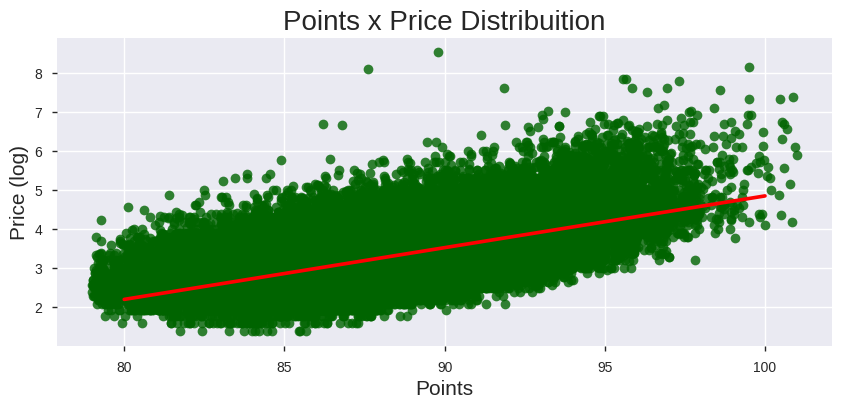

In [ ]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df_wine, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

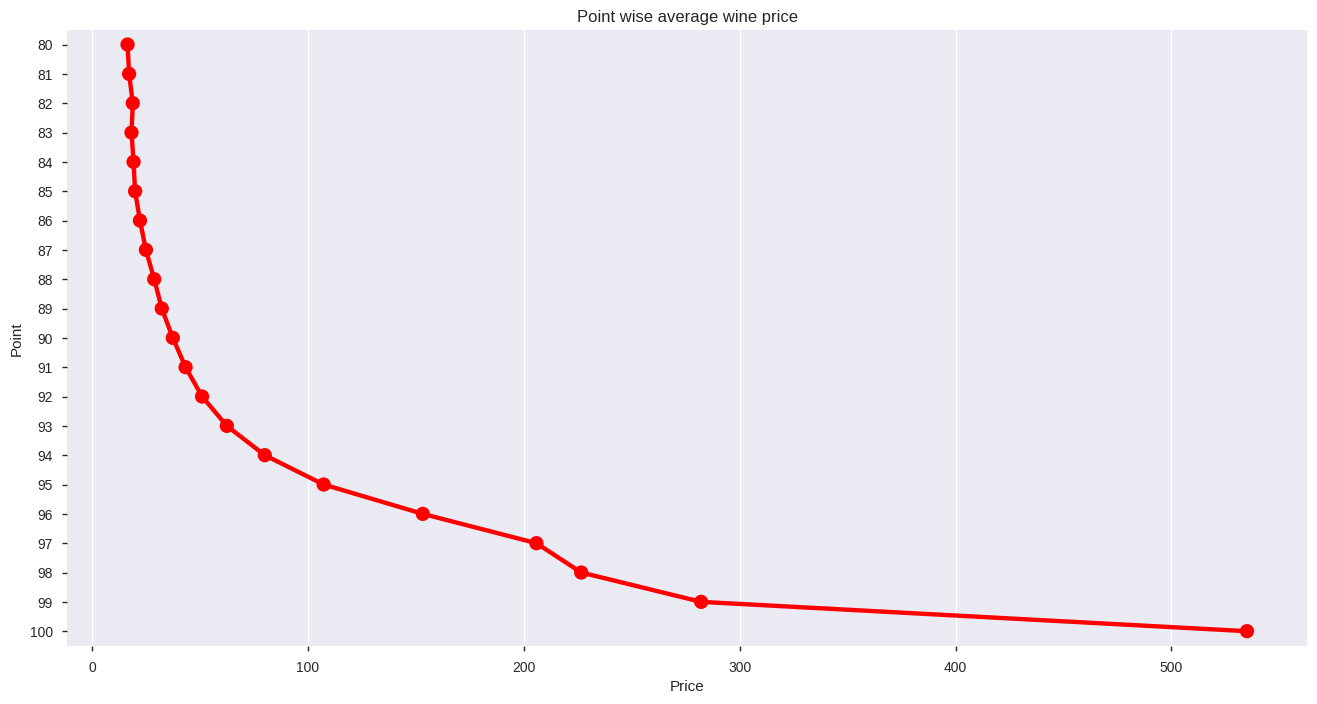

In [ ]:
cnt = df_wine.groupby(['points',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Point wise average wine price')
plt.xlabel('Price')
plt.ylabel('Point');

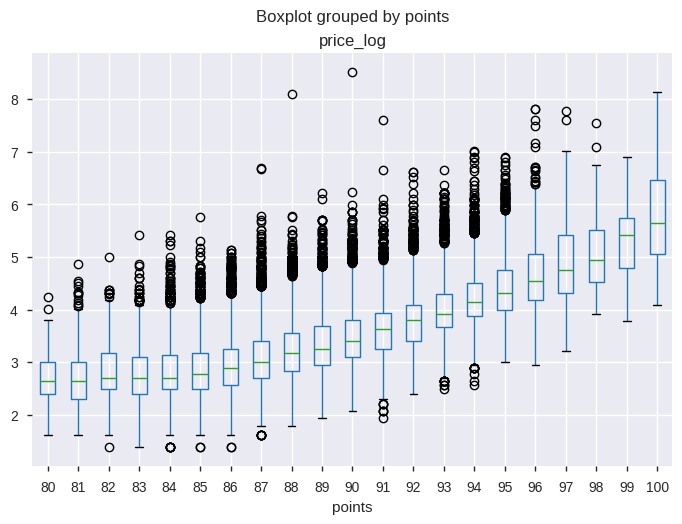

In [ ]:
df_wine.boxplot(column='price_log' , by='points')
plt.show()

From the inital analysis we can see that point an important feature in the dataset. It has a linear relationship with the price. Hence this will feature will be vital for the machine learning models. We also notice that the points are only 80 or highter, that reffers that the dataset we have here is only the hghtest reviewd wines. 

There is no null values, hence we don't need to do any cleanup for this data

### Price Data cleanup

In [ ]:
df_wine['price'].value_counts().head(10)

20.0    7481
15.0    6526
25.0    6417
30.0    5424
18.0    5180
40.0    4271
35.0    4182
12.0    4137
13.0    3772
16.0    3746
Name: price, dtype: int64

In [ ]:
print('Max Value:',df_wine['price'].max())
print('Min Value', df_wine['price'].min())
print('Mean Value', df_wine['price'].mean())
print('Standard deviation', df_wine['price'].std())
print('Median', df_wine['price'].median())

Max Value: 5000.0
Min Value 4.0
Mean Value 36.252263043774924
Standard deviation 45.9906206495996
Median 26.0


In [ ]:
len(df_wine[df_wine['price'].isnull()])

9654

In [ ]:
df_wine['price'].value_counts().count()

413

In [ ]:
designation_missing = len(df_wine[df_wine['price'].isnull()])/df_wine.shape[0]*100
print(f'{designation_missing:.2f}% price are missing in the dataset')

6.82% price are missing in the dataset


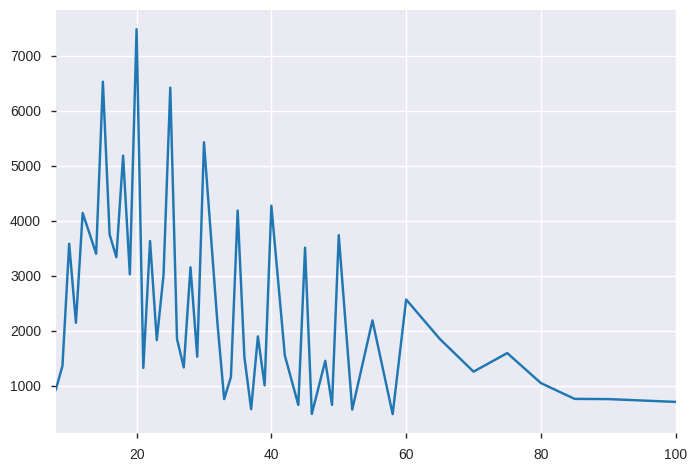

In [ ]:
df_wine['price'].value_counts().head(50).sort_index().plot.line()

In [ ]:
df_wine[df_wine['price'].isnull()]['country'].value_counts().head(10)

France          4680
Italy           2759
Portugal         791
Austria          566
US               309
South Africa     147
Spain             92
Chile             67
Argentina         54
Germany           51
Name: country, dtype: int64

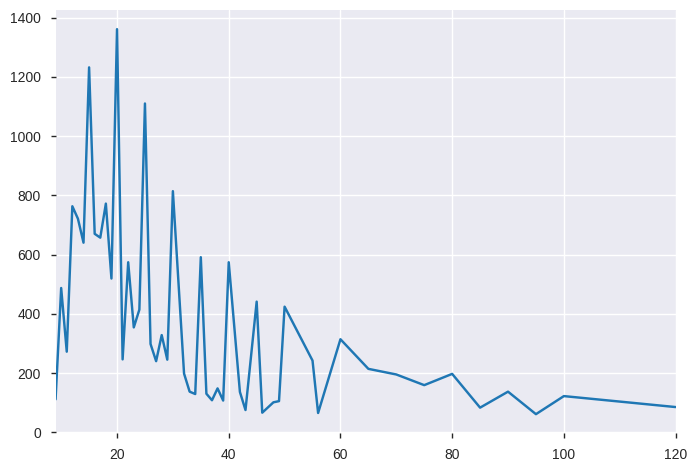

In [ ]:
df_wine.loc[df_wine['country'] == 'France']['price'].value_counts().head(50).sort_index().plot.line()

In [ ]:
df_wine = df_wine.dropna(subset =['price'])

From the analysis we can see that 6.8% price data is missing in the dataset. Based on country we can see many French, Italian and Pourtugeese wine prices are missing. As out target is to predict wine price, and its only 6.8% data, we decided to remove the rows where price data is not available

In [ ]:
df_wine = df_wine.dropna(subset =['price'])

#### Price category

In [ ]:
bin_labels = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df_wine['price_category'] = pd.qcut(df_wine['price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels)

In [ ]:
df_wine['price_category'].value_counts()

Silver      27711
Gold        26967
Bronze      26479
Diamond     26288
Platinum    24457
Name: price_category, dtype: int64

In [ ]:
df_wine.loc[df_wine['price_category'] == 'Diamond']['price'].value_counts()

50.0      3734
60.0      2564
55.0      2184
65.0      1847
75.0      1590
          ... 
288.0        1
1600.0       1
3300.0       1
281.0        1
228.0        1
Name: price, Length: 367, dtype: int64

In [ ]:
df_wine.describe(include='category')

,price_category
count,131902
unique,5
top,Silver
freq,27711


In [ ]:
rev = df_wine.groupby('price_category')['price_log'].mean().reset_index()
trace1 = go.Scatter(
    x = rev['price_category'],
    y = rev['price_log'],
    mode = 'lines+markers',
    name = 'lines+markers'
)
layout = dict(title= 'Wine Catagory',
              yaxis = dict(title='Average Price'),
              xaxis = dict(title='wine catagory'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

#### Finding Outliears in price data

Text(0, 0.5, 'Price')

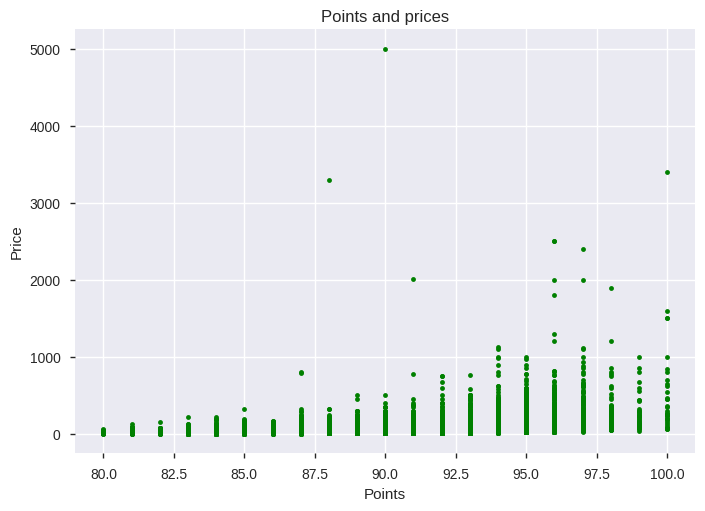

In [ ]:
plt.plot(df_wine['points'], df_wine['price'], "g.")
plt.title("Points and prices")
plt.xlabel("Points")
plt.ylabel("Price")

In [ ]:
df_wine.loc[df_wine['price'] >500]['price'].value_counts()

800.0     7
550.0     6
775.0     4
600.0     4
625.0     4
         ..
2013.0    1
1116.0    1
820.0     1
2400.0    1
529.0     1
Name: price, Length: 69, dtype: int64

In [ ]:
len(df_wine.loc[df_wine['price'] >500]['price'].value_counts())

69

In [ ]:
df_wine.drop( df_wine[ df_wine['price'] > 100 ].index , inplace=True)

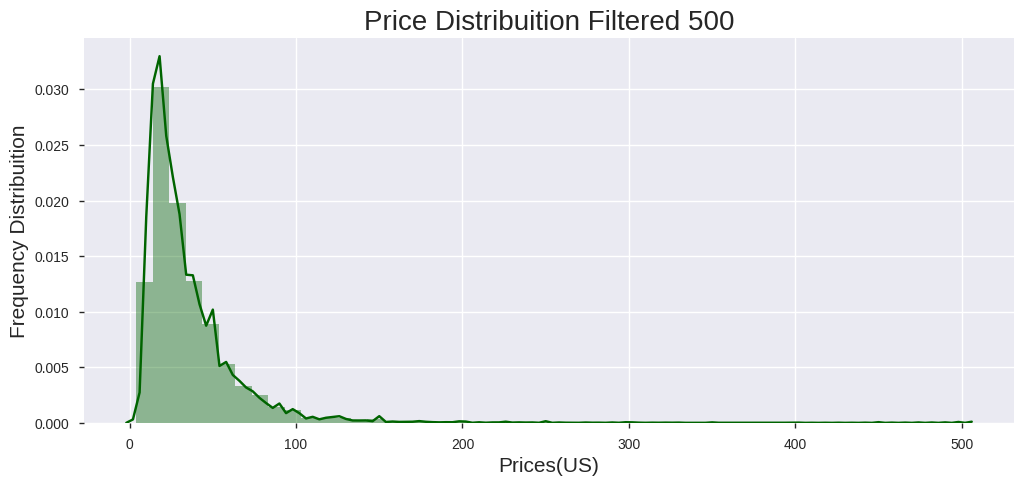

In [ ]:
plt.figure(figsize=(12,5))

g = sns.distplot(df_wine[df_wine['price'] < 5000]['price'], color='darkgreen')
g.set_title("Price Distribuition Filtered 500", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

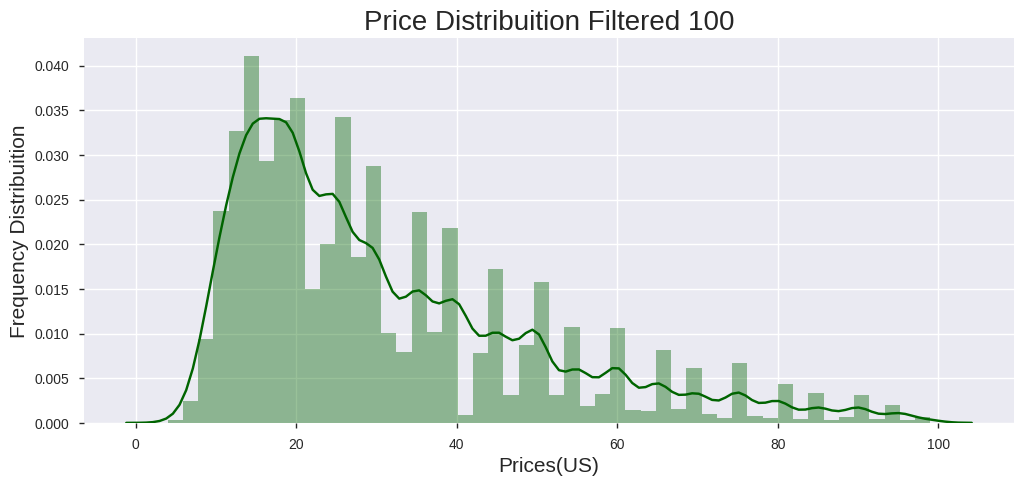

In [ ]:
plt.figure(figsize=(12,5))

g = sns.distplot(df_wine[df_wine['price'] < 100]['price'], color='darkgreen')
g.set_title("Price Distribuition Filtered 100", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

### Province data analysis

In [ ]:
df_wine['province'].value_counts().count()

450

In [ ]:
len(df_wine[df_wine['province'].isnull()])

0

In [ ]:
df_wine['province'].value_counts().head(10)

California          38881
Washington           8981
Oregon               6208
Tuscany              5541
Bordeaux             4549
Northern Spain       4148
Piedmont             3526
Burgundy             3474
Mendoza Province     3404
New York             2681
Name: province, dtype: int64

In [ ]:
cnt = df_wine.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Blues',high=0.5)

,province,country,points,count,min,max,mean
0,Colares,Portugal,93,1,495,495,495
1,Rheingau,Germany,97,2,445,486,465.5
2,Northern Spain,Spain,98,1,450,450,450
3,Douro,Portugal,100,1,450,450,450
4,Douro,Portugal,99,1,426,426,426
5,Piedmont,Italy,99,3,175,440,351.667
6,Languedoc-Roussillon,France,95,1,350,350,350
7,Victoria,Australia,100,1,350,350,350
8,Stellenbosch,South Africa,96,1,330,330,330
9,Coastal Region,South Africa,95,1,330,330,330


No missing data. And it seams like province data quite valied. Hence no action required for this feature

### Region 1 Data Analysis

In [ ]:
df_wine['region_1'].value_counts().count()

1268

In [ ]:
len(df_wine[df_wine['region_1'].isnull()])

21069

In [ ]:
df_wine['region_1'].value_counts().head(-10)

Napa Valley                   4595
Columbia Valley (WA)          4264
Russian River Valley          3267
California                    2850
Willamette Valley             2556
                              ... 
Vin de Pays de France            1
Saint-Chinian-Roquebrun          1
Delia Nivolelli                  1
Recioto della Valpolicella       1
McDowell Valley                  1
Name: region_1, Length: 1258, dtype: int64

In [ ]:
df_wine[df_wine['region_1'].isnull()]

,country,description,points,price,province,region_1,taster_name,region_2,variety,winery,vintage,price_log,price_category
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,NaN,Portuguese Red,Quinta dos Avidagos,2011.0,2.708050,Bronze
8,Germany,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,NaN,Anna Lee C. Iijima,NaN,Gewürztraminer,Heinz Eifel,2013.0,2.484907,Bronze
15,Germany,Zesty orange peels and apple notes abound in t...,87,24.0,Mosel,NaN,Anna Lee C. Iijima,NaN,Riesling,Richard Böcking,2013.0,3.178054,Gold
36,Chile,"White flower, lychee and apple aromas carry th...",86,15.0,Colchagua Valley,NaN,Michael Schachner,NaN,Viognier-Chardonnay,Estampa,2011.0,2.708050,Bronze
44,Chile,A berry aroma comes with cola and herb notes. ...,86,9.0,Maule Valley,NaN,Michael Schachner,NaN,Merlot,Sundance,2011.0,2.197225,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141571,Germany,Racy streaks of lime and green apple make this...,89,22.0,Mosel,NaN,Anna Lee C. Iijima,NaN,Riesling,Reinhold Haart,2016.0,3.091042,Silver
141576,Germany,Juicy sun-ripened pineapple and citrus flavors...,89,17.0,Mosel,NaN,Anna Lee C. Iijima,NaN,Riesling,Schloss Saarstein,2016.0,2.833213,Silver
141586,South Africa,"There's a lifted, vibrant impression to the no...",93,275.0,Simonsberg-Stellenbosch,NaN,Lauren Buzzeo,NaN,Pinotage,Kanonkop,2014.0,5.616771,Diamond
141589,Portugal,"Batuta, named after the baton used by an orche...",93,95.0,Douro,NaN,Roger Voss,NaN,Portuguese Red,Niepoort,2015.0,4.553877,Diamond


In [ ]:
df_wine.region_1.fillna(df_wine.province, inplace=True)

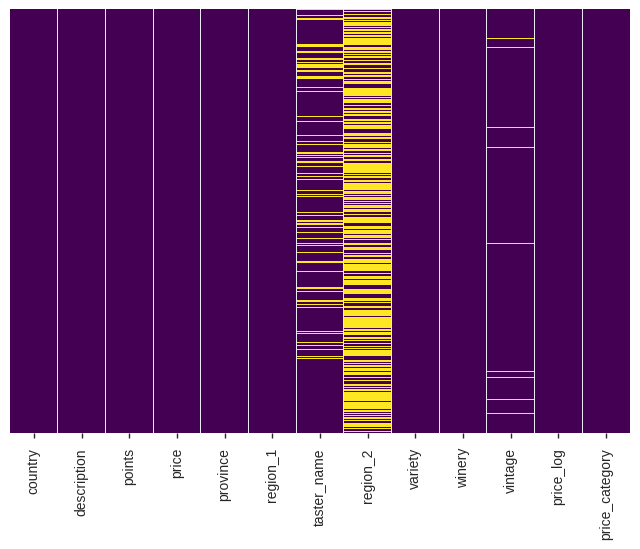

In [ ]:
sns.heatmap(df_wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Region 2 analysis and cleanup

In [ ]:
df_wine['region_2'].value_counts().count()

19

In [ ]:
df_wine['region_2'].value_counts().head(10)

Central Coast        11956
Sonoma                9578
Columbia Valley       8437
Napa                  7099
Willamette Valley     4094
California Other      2888
Finger Lakes          1812
Sierra Foothills      1631
Napa-Sonoma           1265
Central Valley        1201
Name: region_2, dtype: int64

In [ ]:
len(df_wine[df_wine['region_2'].isnull()])

77279

In [ ]:
df_wine[df_wine['region_2'].isnull()]['region_1'].value_counts()

Mendoza                                    2339
Alsace                                     2221
Barolo                                     1724
Rioja                                      1606
Champagne                                  1568
                                           ... 
Aleatico dell'Elba                            1
Messinia                                      1
Vino de la Tierra Contraviesa Alpujarra       1
Altos de Mendoza                              1
Hawaii                                        1
Name: region_1, Length: 1450, dtype: int64

In [ ]:
df_wine.region_2.fillna(df_wine.region_1, inplace=True)

In [ ]:
len(df_wine[df_wine['region_2'].isnull()])

0

In [ ]:
df_wine['region_2'].value_counts().count()

1457

We can see that almost 50% data for region 2 is not available in our dataset. From here we have two optons. 1. we can delete this feature or 2. replace the null values with region 1 values. For this experiment we will replace the region 2 data with region 1 values. 

### Tester Name

In [ ]:
df_wine['taster_name'].value_counts().count()

19

In [ ]:
df_wine['taster_name'].value_counts().head(10)

Roger Voss            22313
Michael Schachner     15848
Kerin O’Keefe         11588
Virginie Boone        10806
Paul Gregutt          10121
Matt Kettmann          7491
Sean P. Sullivan       5582
Jim Gordon             5146
Anna Lee C. Iijima     4975
Joe Czerwinski         4638
Name: taster_name, dtype: int64

In [ ]:
len(df_wine[df_wine['taster_name'].isnull()])

23269

In [ ]:
len(df[df['taster_name'].isnull()]['taster_twitter_handle'].notnull())

24917

In [ ]:
df_wine['taster_name'].fillna(value='Others', inplace=True)

In [ ]:
df_wine['taster_name'].value_counts().head(10)

Others                23269
Roger Voss            22313
Michael Schachner     15848
Kerin O’Keefe         11588
Virginie Boone        10806
Paul Gregutt          10121
Matt Kettmann          7491
Sean P. Sullivan       5582
Jim Gordon             5146
Anna Lee C. Iijima     4975
Name: taster_name, dtype: int64

No good method to replace taster name, hence replaceing the name with others. We may need to delee this feature if this replace has impact on the price

### Winery Analysis

In [ ]:
df_wine['winery'].value_counts().count()

17386

In [ ]:
df_wine['winery'].value_counts().head(10)

Wines & Winemakers       234
Williams Selyem          232
DFJ Vinhos               224
Testarossa               200
Chateau Ste. Michelle    181
Concha y Toro            166
Louis Latour             161
Columbia Crest           156
Maryhill                 152
Georges Duboeuf          137
Name: winery, dtype: int64

In [ ]:
len(df_wine[df_wine['winery'].isnull()])

0

No data missing. we can leave this feature as it is

### variety data **analysis**

In [ ]:
len(df_wine[df_wine['variety'].isnull()])

1

In [ ]:
df_wine = df_wine.dropna(subset=['variety'])

### Vintage data analysis

In [ ]:
df_wine['vintage'].value_counts().count()

64

In [ ]:
df_wine['vintage'].value_counts().head(10)

2014.0    16006
2013.0    14978
2015.0    14026
2012.0    13876
2011.0    10694
2010.0    10381
2016.0     9222
2009.0     8537
2008.0     6400
2007.0     6222
Name: vintage, dtype: int64

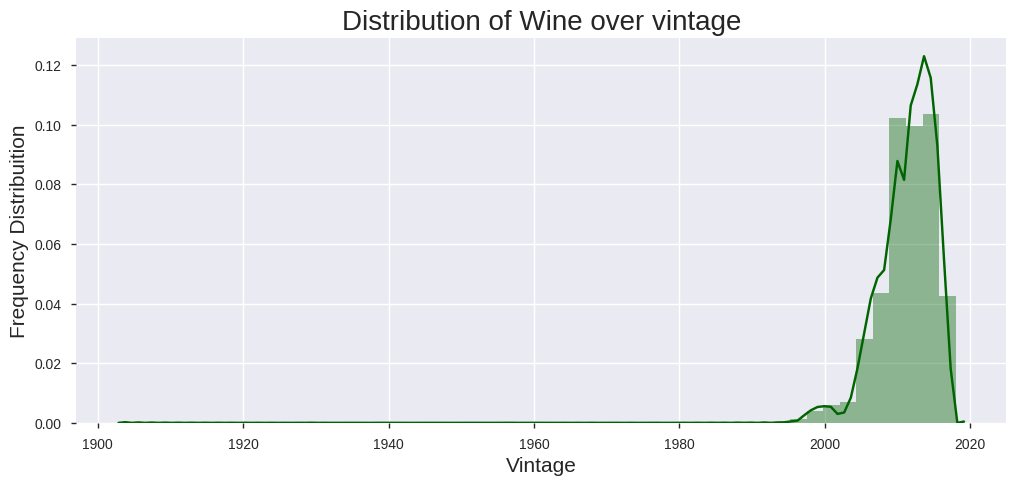

In [ ]:
plt.figure(figsize=(12,5))

g = sns.distplot(df_wine[df_wine['vintage'] >1]['vintage'], color='darkgreen')
g.set_title("Distribution of Wine over vintage", fontsize=20)
g.set_xlabel("Vintage", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

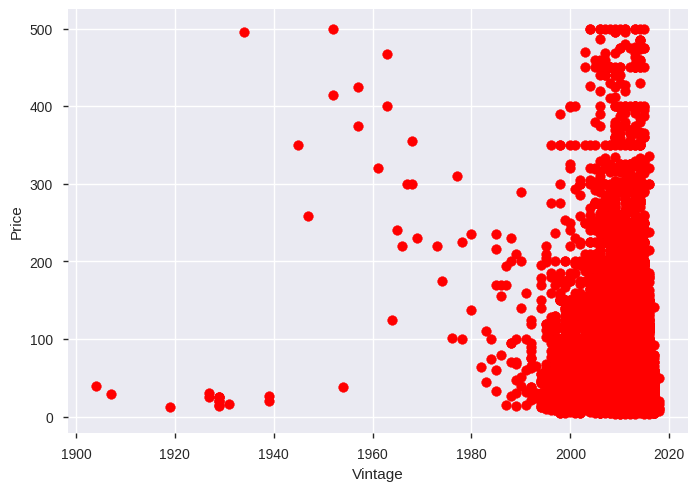

In [ ]:
plt.scatter(df_wine['vintage'], df_wine['price'], color='red')
plt.xlabel('Vintage')
plt.ylabel('Price')
plt.show()

In [ ]:
len(df_wine[df_wine['vintage'].isnull()])

4748

In [ ]:
df_wine['vintage'].fillna((df_wine['vintage'].median()), inplace=True)

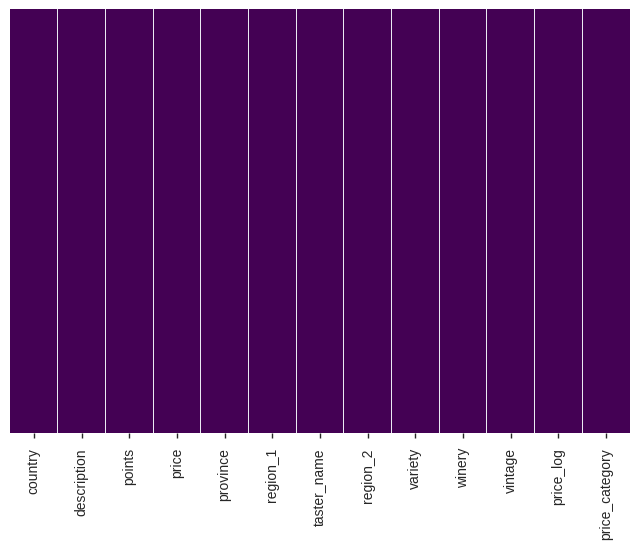

In [ ]:
sns.heatmap(df_wine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Description Analysis

(-0.5, 399.5, 199.5, -0.5)

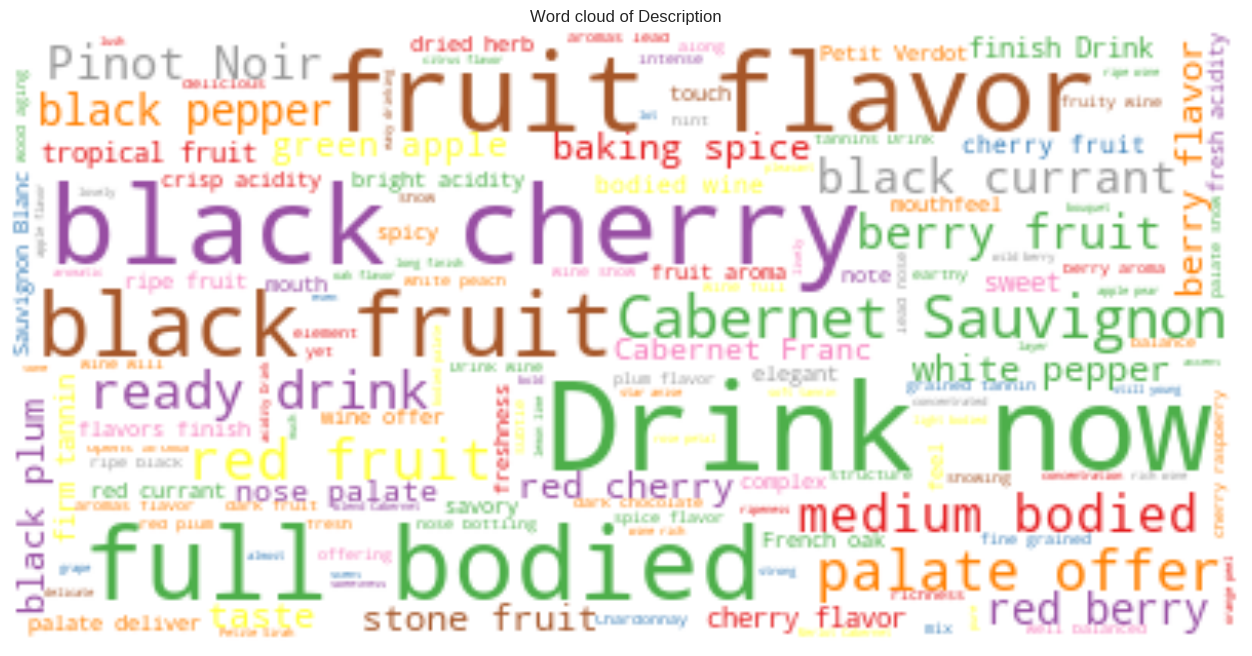

In [ ]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='white', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(df_wine['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')

In [ ]:
df_wine['description_length']  = df_wine['description'].str.len()
df_wine

,country,description,points,price,province,region_1,taster_name,region_2,variety,winery,vintage,price_log,price_category,description_length
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Douro,Roger Voss,Douro,Portuguese Red,Quinta dos Avidagos,2011.0,2.708050,Bronze,227
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Willamette Valley,Pinot Gris,Rainstorm,2013.0,2.639057,Bronze,186
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Lake Michigan Shore,Riesling,St. Julian,2013.0,2.564949,Bronze,199
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Willamette Valley,Pinot Noir,Sweet Cheeks,2012.0,4.174387,Diamond,249
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Navarra,Tempranillo-Merlot,Tandem,2011.0,2.708050,Bronze,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141612,France,This top red cuvée from the historic Bargemone...,92,35.0,Provence,Coteaux d'Aix-en-Provence,Roger Voss,Coteaux d'Aix-en-Provence,Provence red blend,Commanderie de la Bargemone,2013.0,3.555348,Platinum,299
141613,US,"This is a hugely structured, boldly layered wi...",92,75.0,California,Rutherford,Virginie Boone,Napa,Chardonnay,D.R. Stephens,2016.0,4.317488,Diamond,190
141614,US,"From estate-grown Pinot Noir and Chardonnay, t...",92,37.0,California,Carneros,Virginie Boone,Napa-Sonoma,Sparkling Blend,Domaine Carneros,2012.0,3.610918,Platinum,253
141615,France,Whiffs of Mediterranean herb and crushed stone...,92,60.0,Rhône Valley,Châteauneuf-du-Pape,Anna Lee C. Iijima,Châteauneuf-du-Pape,Rhône-style Red Blend,Domaine du Grand Tinel,2015.0,4.094345,Diamond,367


In [ ]:
rev = df_wine.groupby('description_length')['price'].mean().reset_index()
trace1 = go.Scatter(
    x = rev['description_length'],
    y = rev['price'],
    mode = 'lines+markers',
    name = 'lines+markers'
)
layout = dict(title= 'Average Price by wine description Length',
              yaxis = dict(title='Average Price'),
              xaxis = dict(title='wine description Length'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)

## Final data selection

In [ ]:
df_wine.columns

Index(['country', 'description', 'points', 'price', 'province', 'region_1',
       'taster_name', 'region_2', 'variety', 'winery', 'vintage', 'price_log',
       'price_category', 'description_length'],
      dtype='object')

In [ ]:
df_wine_backup = df_wine[['country', 'description', 'points', 'price', 'province', 'region_1',
       'taster_name', 'region_2', 'variety', 'winery', 'vintage', 'price_log',
       'price_category', 'description_length']]
df_wine_backup.head(2)

,country,description,points,price,province,region_1,taster_name,region_2,variety,winery,vintage,price_log,price_category,description_length
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Douro,Roger Voss,Douro,Portuguese Red,Quinta dos Avidagos,2011.0,2.708050,Bronze,227
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Willamette Valley,Pinot Gris,Rainstorm,2013.0,2.639057,Bronze,186


In [ ]:
df_wine = df_wine[['country', 'points', 'province', 'region_1', 'region_2', 'taster_name', 'variety', 'winery', 'vintage', 'description_length','price','price_category']]
df_wine.head(2)

,country,points,province,region_1,region_2,taster_name,variety,winery,vintage,description_length,price,price_category
1,Portugal,87,Douro,Douro,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011.0,227,15.0,Bronze
2,US,87,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,2013.0,186,14.0,Bronze


# Feature Encoding

### Encoding Country
One hot encoding

In [ ]:
country_frequency_map = df_wine.province.value_counts().to_dict()
unique_country = np.unique(df_wine[['country']])
len(unique_country)

43

In [ ]:
# One hot encoding cuntry feature
df_wine = pd.concat([df_wine,pd.get_dummies(df_wine['country'], prefix='country',dummy_na=True)],axis=1).drop(['country'],axis=1)
df_wine.head(2)

,points,province,region_1,region_2,taster_name,variety,winery,vintage,description_length,price,price_category,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,country_Cyprus,country_Czech Republic,country_England,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Israel,country_Italy,country_Kosovo,country_Lebanon,country_Luxembourg,country_Macedonia,country_Mexico,country_Moldova,country_Morocco,country_New Zealand,country_Peru,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay,country_nan
1,87,1253,1253,1253,22313,2405,12,2011.0,227,15.0,Bronze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,87,6208,2556,4367,10121,1505,12,2013.0,186,14.0,Bronze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Encoding provience
Frequency distribution

In [ ]:
unique_province = np.unique(df_wine[['province']])
len(unique_province)

450

In [ ]:
province_frequency_map = df_wine.province.value_counts().to_dict()
province_frequency_map

{'Achaia': 6,
 'Aconcagua Costa': 34,
 'Aconcagua Valley': 112,
 'Aegean': 20,
 'Agioritikos': 2,
 'Ahr': 13,
 'Alenquer': 9,
 'Alentejano': 856,
 'Alentejo': 174,
 'Alenteo': 1,
 'Algarve': 9,
 'Alsace': 2511,
 'America': 102,
 'Amindeo': 2,
 'Amyndeon': 8,
 'Andalucia': 191,
 'Ankara': 21,
 'Apalta': 16,
 'Arcadia': 2,
 'Arizona': 47,
 'Armenia': 2,
 'Atacama Valley': 1,
 'Atalanti Valley': 13,
 'Atlantida': 5,
 'Attica': 5,
 'Australia Other': 243,
 'Austria': 22,
 'Awatere Valley': 28,
 'Baden': 78,
 'Bairrada': 164,
 'Banghoek': 1,
 'Beaujolais': 1029,
 'Beira Atlantico': 13,
 'Beira Interior': 49,
 'Beiras': 13,
 'Bekaa Valley': 20,
 'Beotia': 1,
 'Black Sea Coastal': 3,
 'Bordeaux': 4549,
 'Bot River': 4,
 'Brazil': 6,
 'Brda': 7,
 'Breede River Valley': 1,
 'Breedekloof': 3,
 'British Columbia': 151,
 'Bucelas': 18,
 'Buin': 9,
 'Bulgaria': 10,
 'Burgenland': 589,
 'Burgundy': 3474,
 'Bío Bío Valley': 41,
 'Cachapoal Valley': 210,
 'Cahul': 3,
 'California': 38881,
 'Campanha':

In [ ]:
df_wine.province = df_wine.province.map(province_frequency_map)
df_wine.head(2)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,points,province,region_1,region_2,taster_name,variety,winery,vintage,description_length,price,price_category
1,Portugal,87,1253,Douro,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011.0,227,15.0,Bronze
2,US,87,6208,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,2013.0,186,14.0,Bronze


### Frequency distribution encoding to region_1, retion_2, taster_name, variety and winery features

In [ ]:
region_1_frequency_map = df_wine.region_1.value_counts().to_dict()
region_2_frequency_map = df_wine.region_2.value_counts().to_dict()
taster_name_frequency_map = df_wine.taster_name.value_counts().to_dict()
variety_frequency_map = df_wine.variety.value_counts().to_dict()
winery_frequency_map = df_wine.winery.value_counts().to_dict()

In [ ]:
df_wine.region_1 = df_wine.region_1.map(region_1_frequency_map)
df_wine.region_2 = df_wine.region_2.map(region_2_frequency_map)
df_wine.taster_name = df_wine.taster_name.map(taster_name_frequency_map)
df_wine.variety = df_wine.variety.map(variety_frequency_map)
df_wine.winery = df_wine.winery.map(winery_frequency_map)
df_wine.head(2)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,points,province,region_1,region_2,taster_name,variety,winery,vintage,description_length,price,price_category
1,Portugal,87,1253,1253,1253,22313,2405,12,2011.0,227,15.0,Bronze
2,US,87,6208,2556,4367,10121,1505,12,2013.0,186,14.0,Bronze


In [ ]:
pandas_profiling.ProfileReport(df_wine)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,13
Number of observations,131786
Total Missing (%),0.0%
Total size in memory,12.2 MiB
Average record size in memory,97.0 B
Numeric,11
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Train and Test Split

In [ ]:
X = df_wine.drop(['price','price_category','region_2','taster_name',], axis=1)
X.head()

,points,province,region_1,variety,winery,vintage,description_length,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,country_Cyprus,country_Czech Republic,country_England,country_France,country_Georgia,country_Germany,country_Greece,country_Hungary,country_India,country_Israel,country_Italy,country_Kosovo,country_Lebanon,country_Luxembourg,country_Macedonia,country_Mexico,country_Moldova,country_Morocco,country_New Zealand,country_Peru,country_Portugal,country_Romania,country_Serbia,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay,country_nan
1,87,1253,1253,2405,12,2011.0,227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,87,6208,2556,1505,12,2013.0,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,87,111,31,5364,11,2013.0,199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,87,6208,2556,14199,19,2012.0,249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,87,4148,242,7,16,2011.0,261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
y = df_wine['price']
y.head()

1    15.0
2    14.0
3    13.0
4    65.0
5    15.0
Name: price, dtype: float64

In [ ]:
y_class = df_wine['price_category']
y_class.head()

1     Bronze
2     Bronze
3     Bronze
4    Diamond
5     Bronze
Name: price_category, dtype: category
Categories (5, object): [Bronze < Silver < Gold < Platinum < Diamond]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

### Label encoding: price category

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_wine['price_category'])

LabelEncoder()

In [ ]:
list(le.classes_)

['Bronze', 'Diamond', 'Gold', 'Platinum', 'Silver']

In [ ]:
le.transform(df_wine['price_category']) 

array([0, 0, 0, ..., 3, 1, 3])

In [ ]:
list(le.inverse_transform([2, 2, 1]))

['Gold', 'Gold', 'Diamond']

#Scaling and Normalization

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
x_train = min_max_scaler.fit_transform(x_train)

In [ ]:
x_test = min_max_scaler.transform(x_test)
x_val = min_max_scaler.transform(x_val)

In [ ]:
normalizer = preprocessing.Normalizer().fit(x_train)

In [ ]:
x_train = normalizer.transform(x_train)
x_val = normalizer.transform(x_val)
x_test = normalizer.transform(x_test)

In [ ]:
np.savetxt("x_train.csv", x_train, delimiter=",")
np.savetxt("x_val.csv", x_val, delimiter=",")
np.savetxt("x_test.csv", x_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_val.csv", y_val, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

In [ ]:
df.to_csv('df_wine.csv')

In [ ]:
!cp x_train.csv /content/drive/My\ Drive/data/

In [ ]:
!cp /content/x_test.csv /content/drive/My\ Drive/data/

In [ ]:
!cp /content/x_val.csv /content/drive/My\ Drive/data/
!cp /content/x_test.csv /content/drive/My\ Drive/data/
!cp /content/y_train.csv /content/drive/My\ Drive/data/
!cp /content/y_val.csv /content/drive/My\ Drive/data/
!cp /content/y_test.csv /content/drive/My\ Drive/data/
!cp /content/y_test.csv/content/drive/My\ Drive/data/

cp: missing destination file operand after '/content/y_test.csv/content/drive/My Drive/data/'
Try 'cp --help' for more information.


#Model preperation

## Linear Model

In [ ]:
from sklearn import linear_model
from sklearn import metrics

In [ ]:
regressor = linear_model.LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept: ",regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

Intercept:  43.129455760148076


,Coefficient
points,66.655754
province,3.571939
region_1,3.433404
variety,8.781718
winery,-1.395383
vintage,-52.713643
description_length,8.844006
country_Argentina,-0.405626
country_Armenia,3.814072
country_Australia,-0.102014


In [ ]:
y_pred = regressor.predict(x_val)

In [ ]:
df_result = pd.DataFrame({'Actual': y_val, 'Pred_Linear_model': y_pred})
df_result

,Actual,Pred_Linear_model
2391,13.0,13.678215
38395,80.0,75.465701
83543,13.0,8.105250
85207,45.0,51.486820
6969,35.0,28.421961
...,...,...
67007,32.0,39.811914
78054,20.0,49.356101
132777,10.0,-5.211084
124769,40.0,35.928403


In [ ]:
df_result2 = pd.DataFrame({'Actual': y_val, 'Pred_Linear_model': y_pred})
df_result2

,Actual,Pred_Linear_model
126680,78.0,38.207010
14978,19.0,17.131285
23167,5.0,-2.574513
117338,18.0,37.476384
15266,30.0,24.177110
...,...,...
109380,40.0,31.152506
2837,20.0,23.766714
99925,13.0,27.489133
6456,15.0,10.726075


In [ ]:
r2 =  r2_score(df_result.Actual,df_result.Pred_Linear_model)
mse =  mean_squared_error(df_result.Actual,df_result.Pred_Linear_model)
mae =  mean_absolute_error(df_result.Actual,df_result.Pred_Linear_model)
print(f'r2:{r2}, MSE:{mse}, MAE:{mae}')

r2:0.29278352388983153, MSE:725.5809620685152, MAE:16.172656076546964


In [ ]:
r2 =  r2_score(df_result2.Actual,df_result2.Pred_Linear_model)
mse =  mean_squared_error(df_result2.Actual,df_result2.Pred_Linear_model)
mae =  mean_absolute_error(df_result2.Actual,df_result2.Pred_Linear_model)
print(f'r2:{r2}, MSE:{mse}, MAE:{mae}')

r2:0.37350152303091144, MSE:237.2704983042895, MAE:11.515112878791586


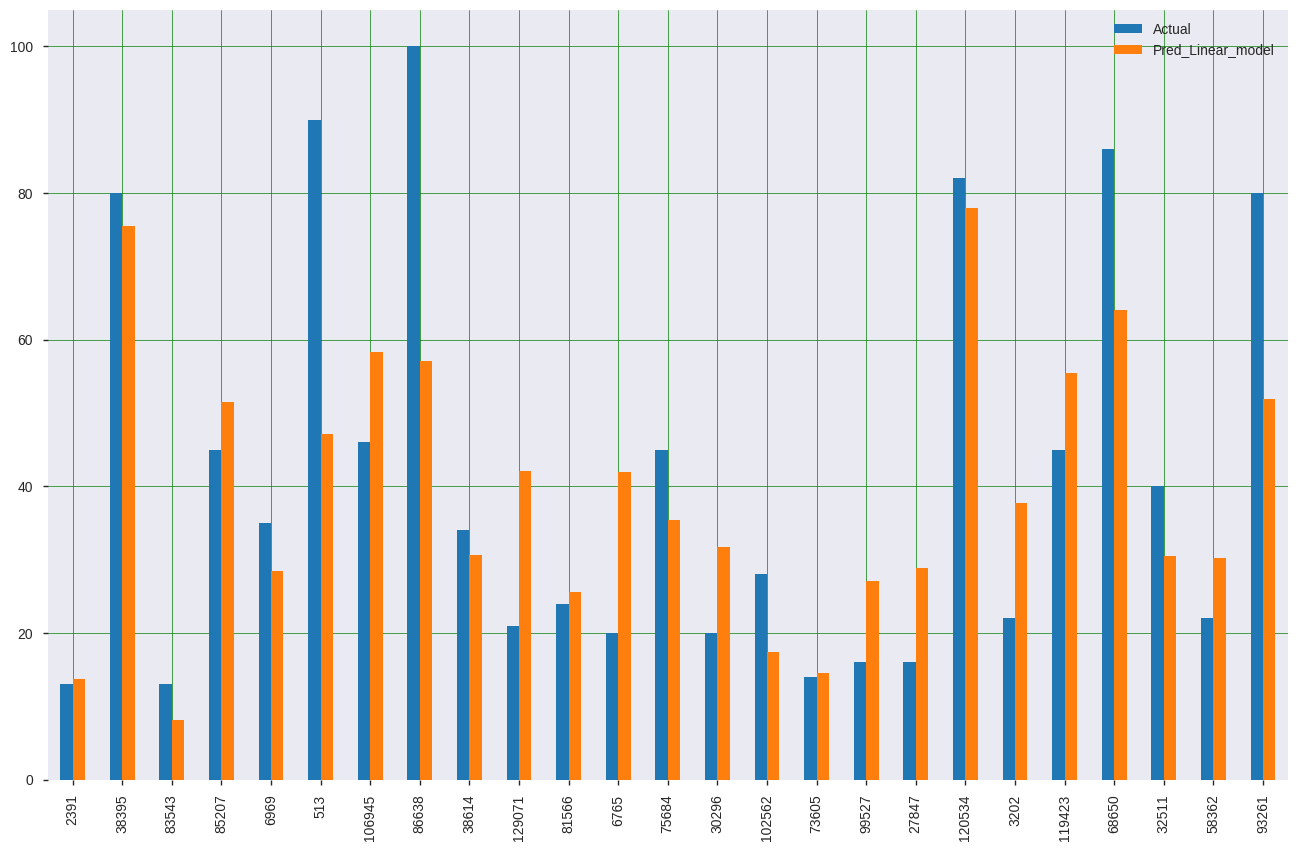

In [ ]:
df1 = df_result.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

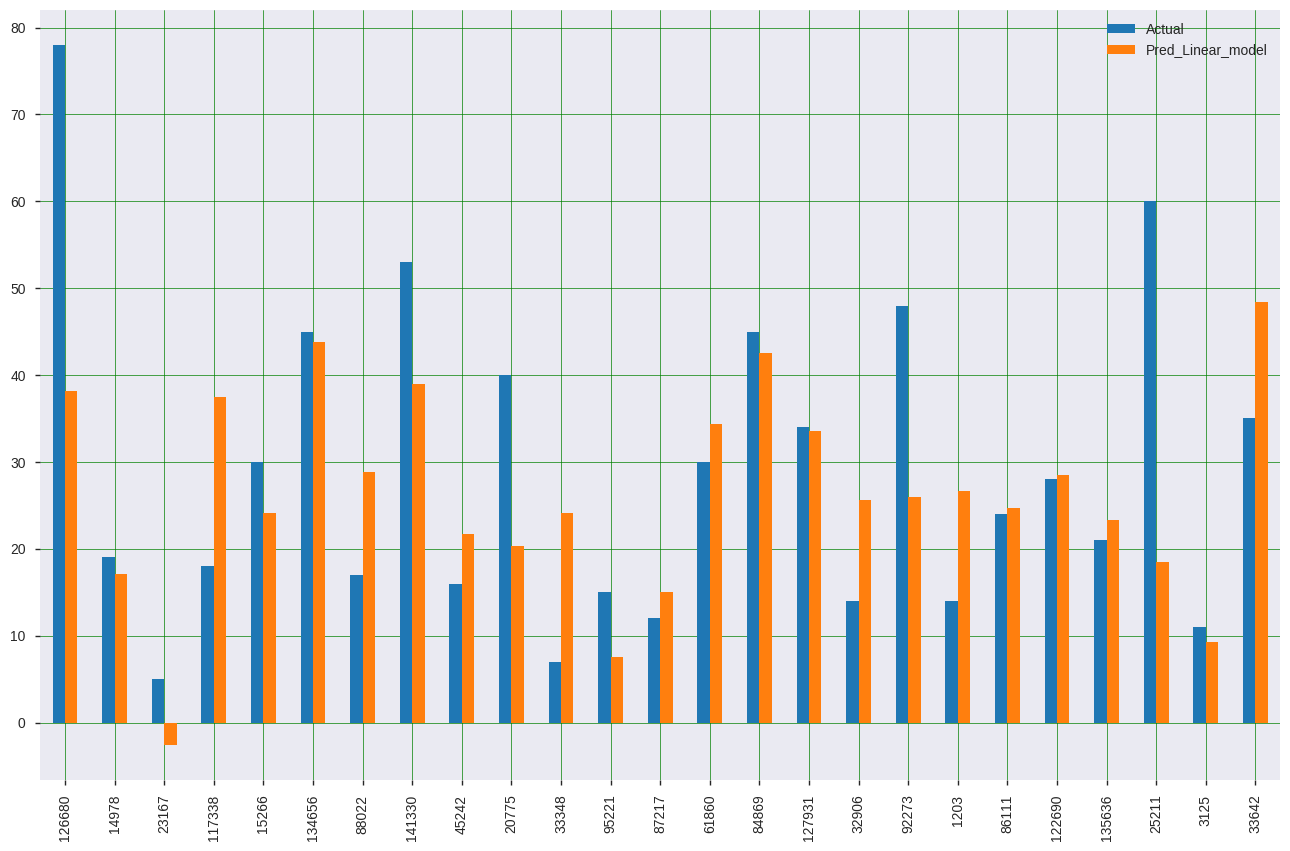

In [ ]:
df1 = df_result2.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence

In [ ]:
mlp = make_pipeline(StandardScaler(),
                    MLPRegressor(hidden_layer_sizes=(100, 100),
                                 tol=1e-2, max_iter=500, random_state=0))
mlp.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100, 100),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=500, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=0, shuffle=True, solver='adam',
                              tol=0.01, validation_fraction=0.1, verbose=False,
                              warm_start=False))],
         verbose=False)

In [ ]:
mlp.get_params(deep=True)

{'memory': None,
 'mlpregressor': MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False),
 'mlpregressor__activation': 'relu',
 'mlpregressor__alpha': 0.0001,
 'mlpregressor__batch_size': 'auto',
 'mlpregressor__beta_1': 0.9,
 'mlpregressor__beta_2': 0.999,
 'mlpregressor__early_stopping': False,
 'mlpregressor__epsilon': 1e-08,
 'mlpregressor__hidden_layer_sizes': (100, 100),
 'mlpregressor__learning_rate': 'constant',
 'mlpregressor__learning_rate_init': 0.001,
 'mlpregressor__max_fun': 15000,
 'mlpregressor__max_iter': 500,
 'mlpregress

In [ ]:
mlp.predict(x_val)

array([ 12.82892405, 126.98697155,  13.26340619, ...,  10.13725964,
        42.13191352,  54.35129457])

In [ ]:
mlp.score(x_val, y_val)

0.5499191919853645

In [ ]:
pred_mlp = mlp.predict(x_val)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

n=3 # how many times to shuffle the training data
nhn_range=[8,10,12,14,16,18] # number of hidden neurons

nhn_scores = []
score_dict = {}
for nhn in nhn_range:
    mlp = MLPRegressor(hidden_layer_sizes=(nhn,), activation='tanh', 
                       solver='adam', shuffle=False, random_state=42, 
                       max_iter=20000, momentum=0.7, early_stopping=True, 
                       validation_fraction=0.15)


    nhn_scores = []
    for _ in range(n):

        #x_train = shuffle(x_train)
        score = np.sqrt(-cross_val_score(mlp, x_train, 
                    y_train, 
                    cv=5, scoring='neg_mean_squared_error')).mean()
        nhn_scores.append(score)
    score_dict[nhn] = nhn_scores

In [ ]:
score_df = pd.DataFrame.from_dict(score_dict)
score_df

NameError: ignored

In [ ]:
df_result['Pred_mlp'] = pred_mlp
df_result

,Actual,Pred_Linear_model,Pred_mlp
2391,13.0,16.123515,12.828924
38395,80.0,74.032722,126.986972
83543,13.0,3.794261,13.263406
85207,45.0,50.683675,64.601831
6969,35.0,29.179692,37.461384
...,...,...,...
67007,32.0,40.315053,36.964396
78054,20.0,48.876658,28.839869
132777,10.0,-3.224269,10.137260
124769,40.0,38.311223,42.131914


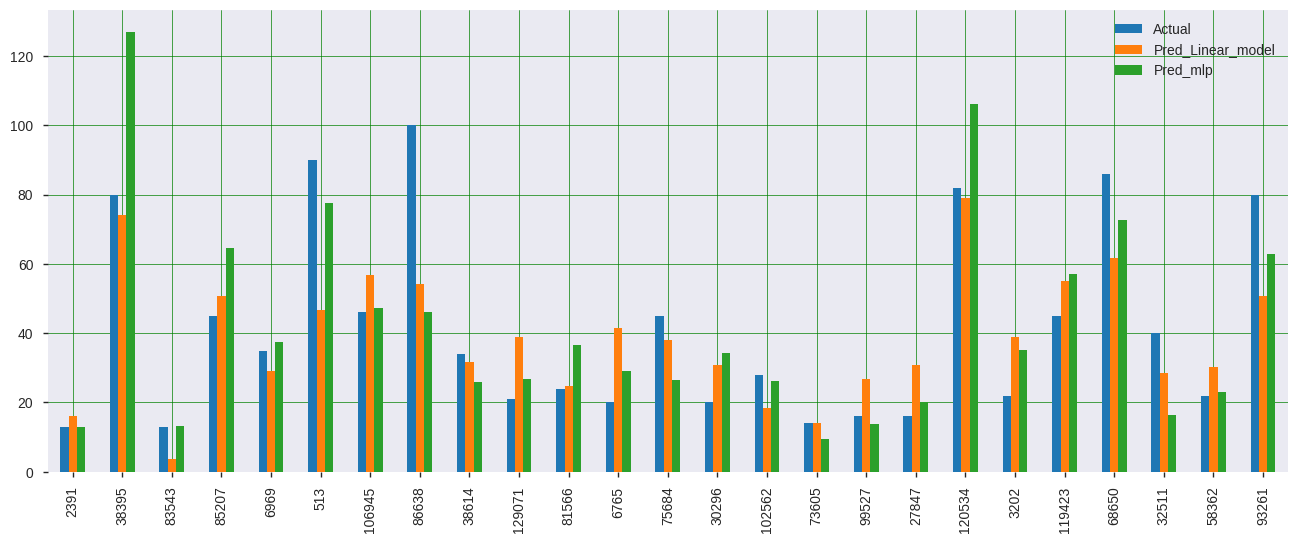

In [ ]:
df1 = df_result.head(25)
df1.plot(kind='bar',figsize=(16,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVR()

In [ ]:
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred_svm = clf.predict(x_val)

In [ ]:
df_result['Pred_svm'] = pred_svm
df_result

,Actual,Pred_Linear_model,Pred_mlp,Pred_svm
2391,13.0,16.123515,12.828924,14.987440
38395,80.0,74.032722,126.986972,63.068114
83543,13.0,3.794261,13.263406,8.441936
85207,45.0,50.683675,64.601831,42.757034
6969,35.0,29.179692,37.461384,23.550300
...,...,...,...,...
67007,32.0,40.315053,36.964396,27.949992
78054,20.0,48.876658,28.839869,29.692247
132777,10.0,-3.224269,10.137260,8.494749
124769,40.0,38.311223,42.131914,41.357302


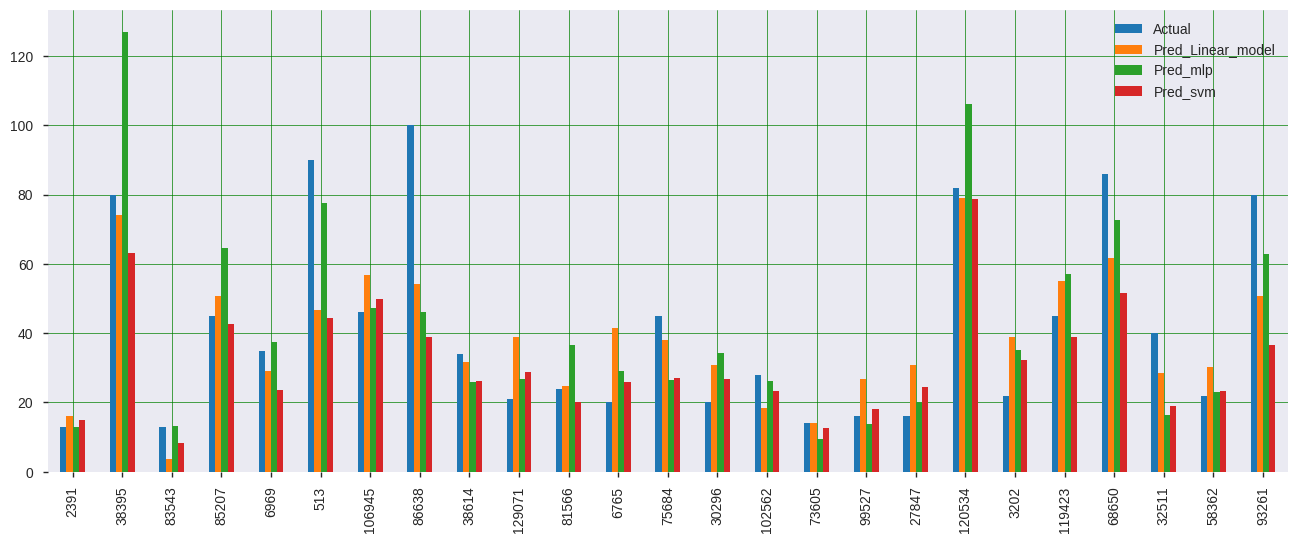

In [ ]:
df1 = df_result.head(25)
df1.plot(kind='bar',figsize=(16,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

In [ ]:
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_upper = clf.predict(x_val)

In [ ]:
df_result['GBR_upper'] = y_upper
df_result

,Actual,Pred_Linear_model,Pred_mlp,Pred_svm,GBR_upper
2391,13.0,16.123515,12.828924,14.987440,14.987440
38395,80.0,74.032722,126.986972,63.068114,63.068114
83543,13.0,3.794261,13.263406,8.441936,8.441936
85207,45.0,50.683675,64.601831,42.757034,42.757034
6969,35.0,29.179692,37.461384,23.550300,23.550300
...,...,...,...,...,...
67007,32.0,40.315053,36.964396,27.949992,27.949992
78054,20.0,48.876658,28.839869,29.692247,29.692247
132777,10.0,-3.224269,10.137260,8.494749,8.494749
124769,40.0,38.311223,42.131914,41.357302,41.357302


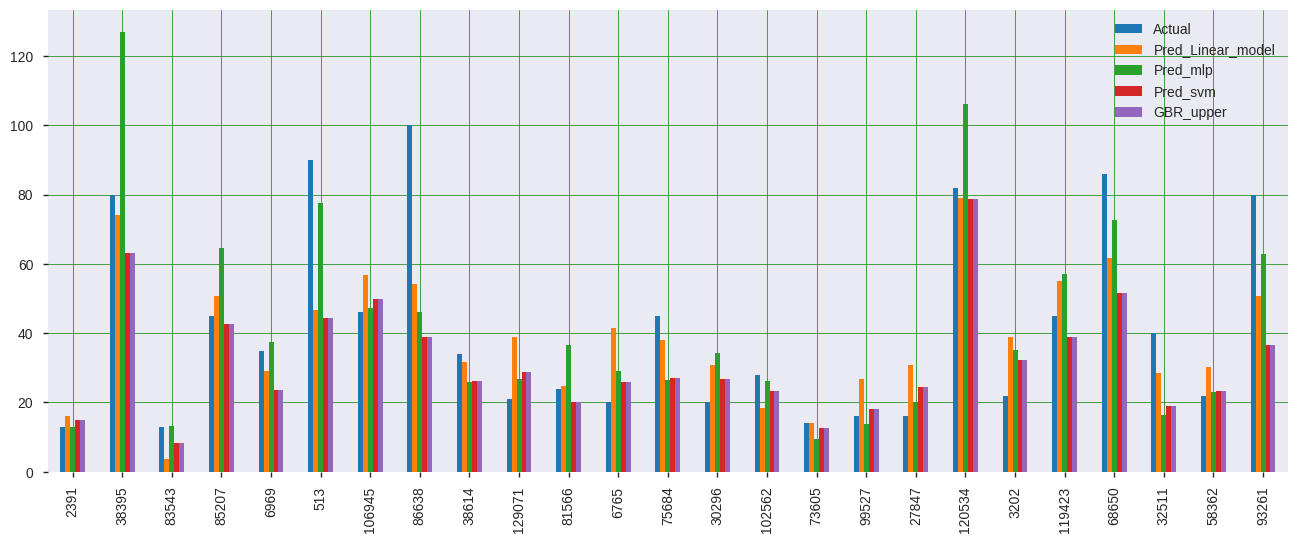

In [ ]:
df1 = df_result.head(25)
df1.plot(kind='bar',figsize=(16,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [ ]:
r2_ln = r2_score(df_result['Actual'], df_result['Pred_Linear_model'])
r2_mlp = r2_score(df_result['Actual'], df_result['Pred_mlp'])
r2_svm = r2_score(df_result['Actual'], df_result['Pred_svm'])
r2_gbr = r2_score(df_result['Actual'], df_result['GBR_upper'])

In [ ]:
df_matrix = pd.DataFrame({'Model': ['Linear','MLP', 'SVM','GBR'], 'R2_Score': [r2_ln,r2_mlp,r2_svm,r2_gbr]})
df_matrix

,Model,R2_Score
0,Linear,0.288218
1,MLP,0.549919
2,SVM,0.285782
3,GBR,0.285782


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_ln = mean_squared_error(df_result['Actual'], df_result['Pred_Linear_model'])
mse_mlp = mean_squared_error(df_result['Actual'], df_result['Pred_mlp'])
mse_svm = mean_squared_error(df_result['Actual'], df_result['Pred_svm'])
mse_gbr = mean_squared_error(df_result['Actual'], df_result['GBR_upper'])

In [ ]:
df_matrix['MSE'] = [mse_ln,mse_mlp,mse_svm, mse_gbr]
df_matrix

,Model,R2_Score,MSE
0,Linear,0.288218,730.265497
1,MLP,0.549919,461.768181
2,SVM,0.285782,732.763829
3,GBR,0.285782,732.763829


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae_ln = mean_absolute_error(df_result['Actual'], df_result['Pred_Linear_model'])
mae_mlp = mean_absolute_error(df_result['Actual'], df_result['Pred_mlp'])
mae_svm = mean_absolute_error(df_result['Actual'], df_result['Pred_svm'])
mae_gbr = mean_absolute_error(df_result['Actual'], df_result['GBR_upper'])

In [ ]:
df_matrix['MAE'] = [mae_ln,mae_mlp,mae_svm,mae_gbr]
df_matrix

,Model,R2_Score,MSE,MAE
0,Linear,0.288218,730.265497,16.200241
1,MLP,0.549919,461.768181,12.142759
2,SVM,0.285782,732.763829,13.416374
3,GBR,0.285782,732.763829,13.416374
